Submitted by

Jamal Ahmad Khan (366394) ~ Task 1 + Lab Report

Muhammad Hassaan Qaisar (369095) ~ Task 2

## **Lab 4: Hyperparameter Tuning in Neural Network**

Most machine learning workflows involve working with data, creating models, optimizing model parameters, and saving the trained models. This tutorial introduces you to a complete ML workflow implemented in PyTorch covering all these steps.

### **Task 1**

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import random
import numpy as np

Check if GPU is available.

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print ('<== CUDA availability : ==>', use_cuda)

<== CUDA availability : ==> True


Set seed for reproducability.

In [3]:
def set_seeds(seed):
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.determinictic = True
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)
set_seeds(42)

PyTorch offers domain-specific libraries such as <b>TorchText, TorchVision, and TorchAudio,</b> all of which include datasets. For this lab, we will be using a TorchVision dataset. Load one of the prebuilt datasets from pytorch repository. Currently, we are not using any transform (manipulation) on input data. We are just converting each image to tensor.


In [4]:
# Download train data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17633436.60it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 484647.46it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 987489.05it/s] 


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3351016.49it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Visualise some of the input images.

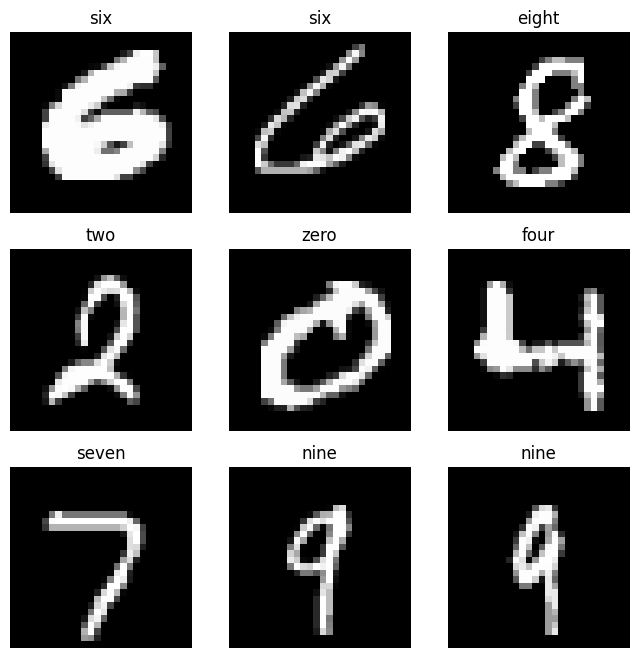

In [5]:
labels_map = {
    0: "zero",
    1: "one",
    2: "two",
    3: "three",
    4: "four",
    5: "five",
    6: "six",
    7: "seven",
    8: "eight",
    9: "nine",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):  # (3 x 3 + 1 = 10)
    sample_idx = torch.randint(len(training_data), size=(1,)).item()  # randomly pick indices from the training data
    img, label = training_data[sample_idx]                            # Read the images using their indices.
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Check the size and shape of training and validation data.

In [6]:
# Visualize the size of the datasets

print(f"Training data size: {len(training_data)} samples")
print(f"Test data size: {len(test_data)} samples")

Training data size: 60000 samples
Test data size: 10000 samples


In [7]:
# Visualize the shape of a single image and its label

train_image, train_label = training_data[0]  # Get the first training sample
test_image, test_label = test_data[0]        # Get the first test sample

print(f"Shape of a training image: {train_image.shape}")  # (1, 28, 28) - 1 channel, 28x28 pixels
print(f"Shape of a test image: {test_image.shape}")
print(f"Training label: {train_label}")
print(f"Test label: {test_label}")

Shape of a training image: torch.Size([1, 28, 28])
Shape of a test image: torch.Size([1, 28, 28])
Training label: 5
Test label: 7


The shape of the training set is (6000,2). This means that we have 6000 thousand samples with 2 entities. The first entity is the image and the second entity is its label. Forexample:

**training_data[0][0]** is the first image of training set

**training_data[0][1]** is the label of the first image in the training set

Now pass the Dataset as an argument to DataLoader. This wraps an iterable over our dataset, and supports automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.

In [8]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}") #[batch_size, channels, height, width]
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


To define a neural network in PyTorch, we create a class that inherits from nn.Module. We define the layers of the network in the __init__ function and specify how data will pass through the network in the forward function. To accelerate operations in the neural network, we move it to the GPU if available.

In [9]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()  # calls the __init__() method of nn.Module class
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 128),                    # replace 128 with 256 and then 512
            nn.ReLU(),
            nn.Linear(128, 128),                      # replace 128 with 256 and then 512
            nn.ReLU(),
            nn.Linear(128, 10)                        # replace 128 with 256 and then 512
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)


**Q1: You may change the width of each layer from 128 to 256 and 512 and observe the difference in network performance.**

**Try adding and removing layers. Keeping all other setup the same, how does the network behave with the change in depth (number of layers) and width (size of each layer)?**


**Answer**

When experimenting with changes in the network's width (number of neurons per layer) and depth (number of layers), the behavior of the network can be summarized as follows:

- **Effect of Changing Width**: Increasing the width of each layer, such as from 128 neurons to 256 or 512, allows the model to capture more complex patterns since there are more parameters (neurons) to learn from the data. However, wider layers also increase computational complexity, and if the width becomes too large relative to the dataset, the model may risk overfitting.

- **Effect of Changing Depth**: Adding more layers (increasing depth) enables the model to capture more hierarchical and complex features in the data. However, too many layers can make the model harder to train, lead to overfitting, and increase the risk of vanishing gradients. On the other hand, reducing the depth might result in underfitting, as the model lacks sufficient capacity to capture the complexity of the dataset.

In conclusion, increasing both the depth and width can improve the model's performance but needs to be balanced to avoid overfitting or underfitting. Additionally, the choice of optimizer and learning rate significantly impacts how well and how fast the network learns.

Now define the loss function and set up optimiser.

In [10]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3 )  # lr ~ learning rate

**Q2: Try changing the learning rate from 1e-3 to 1e-4. What do you observe?**

**Try the Adam optimizer instead of SGD. How the learning process changes?**



**Answer**

When changing the learning rate from 1e-3 to 1e-4, the model's performance is significantly affected.

- **Setup 1 (SGD, learning rate 1e-3)**: The model starts with low accuracy but gradually improves with each epoch, `reaching 69.9% accuracy after 5 epochs`. This shows that with a moderate learning rate, the model is able to learn and improve over time.

- **Setup 2 (SGD, learning rate 1e-4)**: The model struggles to learn effectively, with very slow improvement in accuracy, `reaching only 15.8% after 5 epochs`. The lower learning rate causes the model to update its parameters too slowly, making it difficult for the network to converge and learn useful patterns.

When switching to the Adam optimizer:

- **Setup 3 (Adam, learning rate 1e-3)**: The learning process is much faster and more effective, with the model quickly achieving high accuracy (`94.7% in the first epoch and 97.5% by the fifth`). Adam is more adaptive and efficient, adjusting the learning rate automatically for each parameter, which helps the model learn faster and more accurately.

- **Setup 4 (Adam, learning rate 1e-4)**: Although the learning rate is smaller, the model still performs well, `reaching 93.8% accuracy after 5 epochs`. This shows that Adam is more resilient to lower learning rates, allowing the model to learn effectively even with smaller updates.

In summary:

- Lowering the learning rate (1e-4) slows down the learning process, especially with SGD.

- Using the Adam optimizer significantly improves learning speed and performance compared to SGD, even with lower learning rates.

Define train function.

In [11]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    running_loss = 0                            # accumuate loss of each input sample
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)       # assign input samples to the available device (CPU or GPU) for computation.

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()  # set the gradients to zero to avoid gradient accumuation. Gradient Accumulation is useful in some cases, like in training RNN.
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            #print(f"training loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    return running_loss/len(dataloader)

Define evaluation function.

In [12]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():         # No gradients need to be calculated for evaluation. Just the forward pass.
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size               # Normalise correctly classified count.
    print(f"test loss: \nAccuracy: {(100*correct):>0.1f}%, avg loss: {test_loss:>8f} \n")

    return test_loss

Initiate Training Process

Epoch 1
-------------------------------
test loss: 
Accuracy: 94.1%, avg loss: 0.184653 

Epoch 2
-------------------------------
test loss: 
Accuracy: 95.7%, avg loss: 0.130706 

Epoch 3
-------------------------------
test loss: 
Accuracy: 96.7%, avg loss: 0.105729 

Epoch 4
-------------------------------
test loss: 
Accuracy: 96.9%, avg loss: 0.099708 

Epoch 5
-------------------------------
test loss: 
Accuracy: 96.8%, avg loss: 0.108831 

Done!


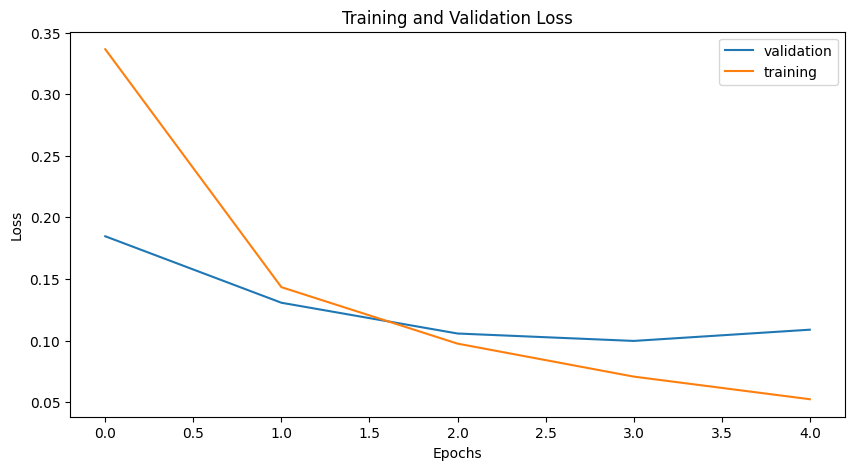

In [13]:
epochs = 5
train_losses = []
test_losses = []

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")

    train_loss = train(train_dataloader, model, loss_fn, optimizer)
    train_losses.append(train_loss)

    test_loss = test(test_dataloader, model, loss_fn)
    test_losses.append(test_loss)

print("Done!")

# Plot training and validation losses.
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(test_losses,label="validation")
plt.plot(train_losses,label="training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Q3: Try 5, 10 and 50 epoch and record values for average validation loss and accuracy**

**Answer**

We have tried all the combinations of different hyperparameters and models with different number of neurons. Out of all those, the best model for this dataset MNIST is mentioned below:

- Model with 512 neurons

**Hyperparameters**

- Adam optimizer with learning rate of 1e-3

**Q4: What activation function is generally used for multiclass classification? Why didn't we use an activation function at the end of our neural network that we have defined?**

**Answer**

For multiclass classification, the **softmax** activation function is generally used. Softmax converts the output of the neural network into a probability distribution, where each class is assigned a probability between 0 and 1, and the sum of all probabilities equals 1. This helps in determining the most likely class.

In our neural network, we didn't use an activation function at the end because many loss functions, like cross-entropy loss, already apply softmax internally. Adding softmax in the last layer could result in redundant calculations. Therefore, leaving it out makes the model more efficient without affecting the results.

In [14]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


Perform Inferrence

Predicted: "four", Actual: "four"


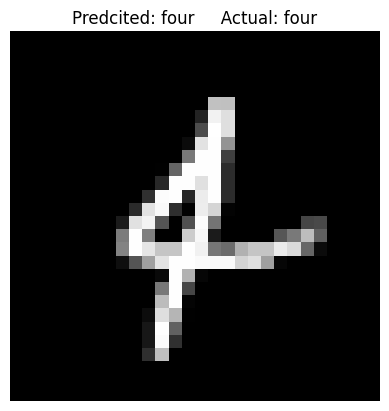

In [15]:
classes = [
    "zero",
    "one",
    "two",
    "three",
    "four",
    "five",
    "six",
    "seven",
    "eight",
    "nine",
]
#classes = np.array(test_data.class_to_idx.values())
#testimg = random.
model.eval()
sample_number = 300 # Keep 0 <= sample_number < 10,000
x, y = test_data[sample_number][0], test_data[sample_number][1]
model.to("cpu")
with torch.no_grad():                                            # no backpropagation
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

img, label = test_data[sample_number]                            # Read the images using their indices.
    #figure.add_subplot(rows, cols, i)
plt.figure()
plt.title("Predcited: "+ predicted + "     Actual: " + labels_map[label])
plt.axis("off")
plt.imshow(img.squeeze(), cmap="gray")

### **Task 2**

**Repeat all of above steps for Fashion MNIST dataset, apply question 1, 2 and 3 and report the accuracies.**

`We have applied the same technique that we have used to solve Task 1 and also we have noted all the accuracies and validation losses in the lab report.`

#### Downloading fashion mnist dataset

In [16]:
# Download train data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:01<00:00, 13297917.10it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 210359.86it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3841884.00it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5945010.19it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



#### Visualize some of the input images

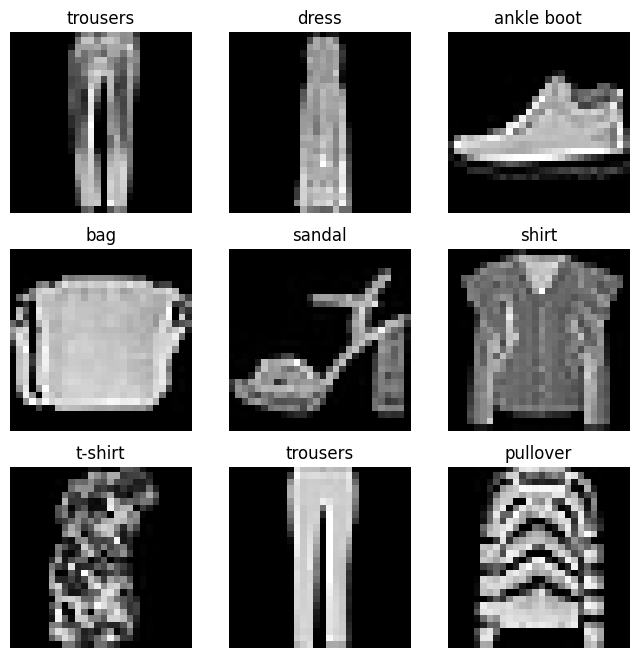

In [17]:
labels_map = {
    0: "t-shirt",
    1: "trousers",
    2: "pullover",
    3: "dress",
    4: "coat",
    5: "sandal",
    6: "shirt",
    7: "sneaker",
    8: "bag",
    9: "ankle boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):  # (3 x 3 + 1 = 10)
    sample_idx = torch.randint(len(training_data), size=(1,)).item()  # randomly pick indices from the training data
    img, label = training_data[sample_idx]                            # Read the images using their indices.
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#### Check the size and shape of training and validation data

In [18]:
# Visualize the size of the datasets

print(f"Training data size: {len(training_data)} samples")
print(f"Test data size: {len(test_data)} samples")

Training data size: 60000 samples
Test data size: 10000 samples


In [19]:
# Visualize the shape of a single image and its label

train_image, train_label = training_data[0]  # Get the first training sample
test_image, test_label = test_data[0]        # Get the first test sample

print(f"Shape of a training image: {train_image.shape}")  # (1, 28, 28) - 1 channel, 28x28 pixels
print(f"Shape of a test image: {test_image.shape}")
print(f"Training label: {train_label}")
print(f"Test label: {test_label}")

Shape of a training image: torch.Size([1, 28, 28])
Shape of a test image: torch.Size([1, 28, 28])
Training label: 9
Test label: 9


In [20]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}") #[batch_size, channels, height, width]
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


#### Define model

In [64]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()  # calls the __init__() method of nn.Module class
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


**Q1: You may change the width of each layer from 128 to 256 and 512 and observe the difference in network performance.**

**Try adding and removing layers. Keeping all other setup the same, how does the network behave with the change in depth (number of layers) and width (size of each layer)?**

**Answer**

When experimenting with changes in the network's width (number of neurons per layer) and depth (number of layers), the behavior of the network can be summarized as follows:

- **Effect of Changing Width**: Increasing the width of each layer, such as from 128 neurons to 256 or 512, allows the model to capture more complex patterns since there are more parameters (neurons) to learn from the data. However, wider layers also increase computational complexity, and if the width becomes too large relative to the dataset, the model may risk overfitting.

- **Effect of Changing Depth**: Adding more layers (increasing depth) enables the model to capture more hierarchical and complex features in the data. However, too many layers can make the model harder to train, lead to overfitting, and increase the risk of vanishing gradients. On the other hand, reducing the depth might result in underfitting, as the model lacks sufficient capacity to capture the complexity of the dataset.

In conclusion, increasing both the depth and width can improve the model's performance but needs to be balanced to avoid overfitting or underfitting. Additionally, the choice of optimizer and learning rate significantly impacts how well and how fast the network learns.

In [65]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3 )  # lr ~ learning rate

**Q2: Try changing the learning rate from 1e-3 to 1e-4. What do you observe?**

**Try the Adam optimizer instead of SGD. How the learning process changes?**



**Answer**

When changing the learning rate from 1e-3 to 1e-4, the model's performance is significantly affected.

- **Setup 1 (SGD, learning rate 1e-3)**: The model starts with low accuracy but gradually improves with each epoch, `reaching 60.1% accuracy after 5 epochs`. This shows that with a moderate learning rate, the model is able to learn and improve over time.

- **Setup 2 (SGD, learning rate 1e-4)**: The model struggles to learn effectively, with very slow improvement in accuracy, `reaching only 19.1% after 5 epochs`. The lower learning rate causes the model to update its parameters too slowly, making it difficult for the network to converge and learn useful patterns.

When switching to the Adam optimizer:

- **Setup 3 (Adam, learning rate 1e-3)**: The learning process is much faster and more effective, with the model quickly achieving high accuracy (`87.0% by the fifth epoch`). Adam is more adaptive and efficient, adjusting the learning rate automatically for each parameter, which helps the model learn faster and more accurately.

- **Setup 4 (Adam, learning rate 1e-4)**: Although the learning rate is smaller, the model still performs well, `reaching 84.4% accuracy after 5 epochs`. This shows that Adam is more resilient to lower learning rates, allowing the model to learn effectively even with smaller updates.

In summary:

- Lowering the learning rate (1e-4) slows down the learning process, especially with SGD.

- Using the Adam optimizer significantly improves learning speed and performance compared to SGD, even with lower learning rates.

#### Define training function

In [66]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    running_loss = 0                            # accumuate loss of each input sample
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)       # assign input samples to the available device (CPU or GPU) for computation.

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()  # set the gradients to zero to avoid gradient accumuation. Gradient Accumulation is useful in some cases, like in training RNN.
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            #print(f"training loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    return running_loss/len(dataloader)

#### Define evaluation function

In [67]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():         # No gradients need to be calculated for evaluation. Just the forward pass.
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size               # Normalise correctly classified count.
    print(f"test loss: \nAccuracy: {(100*correct):>0.1f}%, avg loss: {test_loss:>8f} \n")

    return test_loss

#### Initiate training process

Epoch 1
-------------------------------
test loss: 
Accuracy: 49.3%, avg loss: 2.153591 

Epoch 2
-------------------------------
test loss: 
Accuracy: 58.1%, avg loss: 1.878705 

Epoch 3
-------------------------------
test loss: 
Accuracy: 61.0%, avg loss: 1.511871 

Epoch 4
-------------------------------
test loss: 
Accuracy: 63.7%, avg loss: 1.250979 

Epoch 5
-------------------------------
test loss: 
Accuracy: 65.2%, avg loss: 1.086715 

Epoch 6
-------------------------------
test loss: 
Accuracy: 66.4%, avg loss: 0.979244 

Epoch 7
-------------------------------
test loss: 
Accuracy: 67.3%, avg loss: 0.905502 

Epoch 8
-------------------------------
test loss: 
Accuracy: 68.6%, avg loss: 0.852349 

Epoch 9
-------------------------------
test loss: 
Accuracy: 69.7%, avg loss: 0.812312 

Epoch 10
-------------------------------
test loss: 
Accuracy: 71.2%, avg loss: 0.780698 

Done!


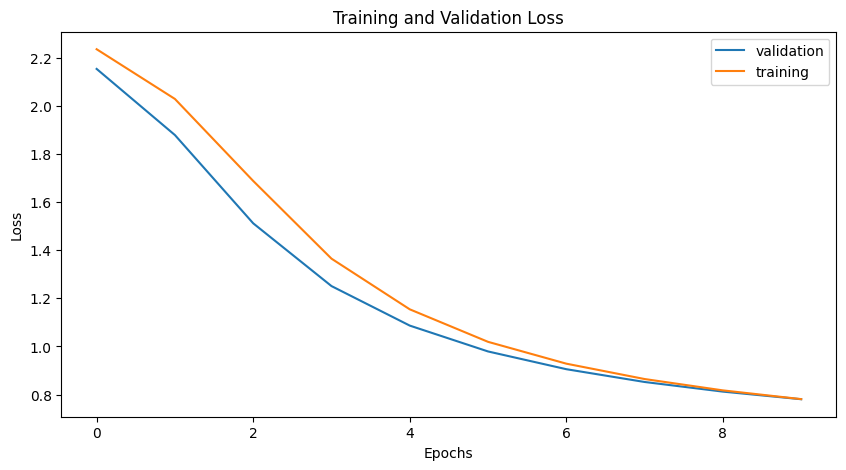

In [68]:
epochs = 10
train_losses = []
test_losses = []

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")

    train_loss = train(train_dataloader, model, loss_fn, optimizer)
    train_losses.append(train_loss)

    test_loss = test(test_dataloader, model, loss_fn)
    test_losses.append(test_loss)

print("Done!")

# Plot training and validation losses.
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(test_losses,label="validation")
plt.plot(train_losses,label="training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Q3: Try 5, 10 and 50 epoch and record values for average validation loss and accuracy**

**Answer**

We have tried all the combinations of different hyperparameters and models with different number of neurons. Out of all those, the best model for this dataset MNIST is mentioned below:

- Model with 512 neurons

**Hyperparameters**

- Adam optimizer with learning rate of 1e-3

#### Save the model

In [69]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


#### Perform inference

Predicted: "dress", Actual: "dress"


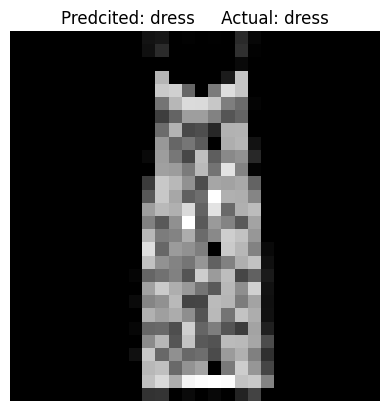

In [70]:
classes = [
    "t-shirt",
    "trousers",
    "pullover",
    "dress",
    "coat",
    "sandal",
    "shirt",
    "sneaker",
    "bag",
    "ankle boot",
]
#classes = np.array(test_data.class_to_idx.values())
#testimg = random.
model.eval()
sample_number = 300 # Keep 0 <= sample_number < 10,000
x, y = test_data[sample_number][0], test_data[sample_number][1]
model.to("cpu")
with torch.no_grad():                                            # no backpropagation
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

img, label = test_data[sample_number]                            # Read the images using their indices.
    #figure.add_subplot(rows, cols, i)
plt.figure()
plt.title("Predcited: "+ predicted + "     Actual: " + labels_map[label])
plt.axis("off")
plt.imshow(img.squeeze(), cmap="gray")

### **Submission Guidelines**

> Along with jupyter file submit a lab report containing codes, screenshots of output and tables for comparision of accuracies for both task 1 and task2 (for both MNIST and Fashion MNIST datasets).

> Try to achieve the best accuracies you can in classifying the images.

> Remember, the more you elaborate your report, the higher the marks you will get.

> This is a group lab. You are advised to make a group of 2. PS: clearly mention the name, registration number and contribution of each group member at the top.